# Bivariate Analysis

## Import libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Import dataset 

In [2]:
data = pd.read_csv("dataset/weatherAUS.csv")
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## Exploring Data

In [3]:
data.shape

(145460, 23)

In [4]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [7]:
data.describe(include='all')

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,145460,145460,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135134,135197.000000,134894,...,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,142199,142193
unique,3436,49,NaN,NaN,NaN,NaN,NaN,16,NaN,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,2013-11-12,Canberra,NaN,NaN,NaN,NaN,NaN,W,NaN,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No
freq,49,3436,NaN,NaN,NaN,NaN,NaN,9915,NaN,11758,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110319,110316
mean,NaN,NaN,12.194034,23.221348,2.360918,5.468232,7.611178,NaN,40.035230,NaN,...,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,NaN,NaN
std,NaN,NaN,6.398495,7.119049,8.478060,4.193704,3.785483,NaN,13.607062,NaN,...,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,NaN,NaN
min,NaN,NaN,-8.500000,-4.800000,0.000000,0.000000,0.000000,NaN,6.000000,NaN,...,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,NaN,NaN
25%,NaN,NaN,7.600000,17.900000,0.000000,2.600000,4.800000,NaN,31.000000,NaN,...,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,NaN,NaN
50%,NaN,NaN,12.000000,22.600000,0.000000,4.800000,8.400000,NaN,39.000000,NaN,...,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,NaN,NaN
75%,NaN,NaN,16.900000,28.200000,0.800000,7.400000,10.600000,NaN,48.000000,NaN,...,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,NaN,NaN


### Finding Correlation

In [8]:
data.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.736555,0.103938,0.466993,0.072586,0.177415,0.175064,0.175173,-0.232899,0.006089,-0.450970,-0.461292,0.078754,0.021605,0.901821,0.708906
MaxTemp,0.736555,1.000000,-0.074992,0.587932,0.470156,0.067615,0.014450,0.050300,-0.504110,-0.508855,-0.332061,-0.427167,-0.289370,-0.277921,0.887210,0.984503
Rainfall,0.103938,-0.074992,1.000000,-0.064351,-0.227549,0.133659,0.087338,0.057887,0.224405,0.255755,-0.168154,-0.126534,0.198528,0.172403,0.011192,-0.079657
Evaporation,0.466993,0.587932,-0.064351,1.000000,0.365602,0.203021,0.193084,0.129400,-0.504092,-0.390243,-0.270362,-0.293581,-0.183793,-0.182618,0.545115,0.572893
Sunshine,0.072586,0.470156,-0.227549,0.365602,1.000000,-0.034750,0.005499,0.053834,-0.490819,-0.629130,0.041970,-0.019719,-0.675323,-0.703930,0.291188,0.490501
WindGustSpeed,0.177415,0.067615,0.133659,0.203021,-0.034750,1.000000,0.605303,0.686307,-0.215070,-0.026327,-0.458744,-0.413749,0.071736,0.109168,0.150150,0.032748
WindSpeed9am,0.175064,0.014450,0.087338,0.193084,0.005499,0.605303,1.000000,0.519547,-0.270858,-0.031614,-0.228743,-0.175817,0.025112,0.054639,0.128545,0.004569
WindSpeed3pm,0.175173,0.050300,0.057887,0.129400,0.053834,0.686307,0.519547,1.000000,-0.145525,0.016432,-0.296351,-0.255439,0.053337,0.025396,0.163030,0.027778
Humidity9am,-0.232899,-0.504110,0.224405,-0.504092,-0.490819,-0.215070,-0.270858,-0.145525,1.000000,0.666949,0.139442,0.186858,0.452297,0.357326,-0.471354,-0.498399
Humidity3pm,0.006089,-0.508855,0.255755,-0.390243,-0.629130,-0.026327,-0.031614,0.016432,0.666949,1.000000,-0.027544,0.051997,0.517120,0.523120,-0.221019,-0.557841


# Bivariate Analysis

## Analysis of Numerical to Numerical Columns

### Exploring Cloud9am Column

In [9]:
# print number of labels in Cloud9am variable
print('Cloud9am conatins', data.Cloud9am.nunique(), 'labels')

Cloud9am conatins 10 labels


In [10]:
data.Cloud9am.value_counts()

7.0    19972
1.0    15687
8.0    14697
0.0     8642
6.0     8171
2.0     6500
3.0     5914
5.0     5567
4.0     4420
9.0        2
Name: Cloud9am, dtype: int64

In [11]:
data.Cloud9am.isna().sum()

55888

In [12]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(8,8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

<AxesSubplot:xlabel='Cloud9am', ylabel='Count'>

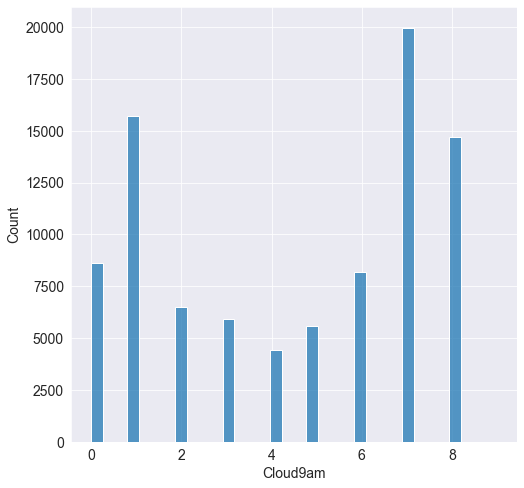

In [13]:
sns.histplot(data.Cloud9am)

<AxesSubplot:xlabel='Cloud3pm', ylabel='Cloud9am'>

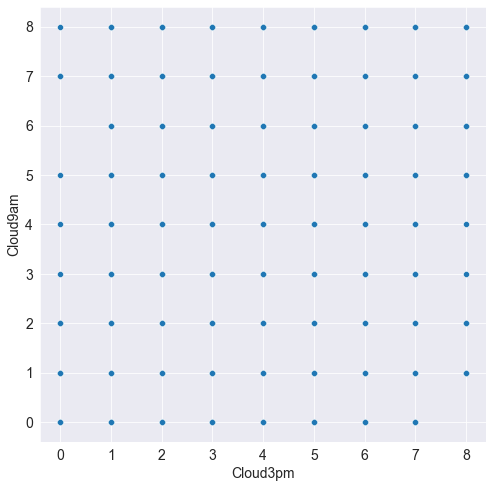

In [14]:
sns.scatterplot( data=data.sample(2000), x='Cloud3pm', y='Cloud9am')

<AxesSubplot:xlabel='Humidity9am', ylabel='Cloud9am'>

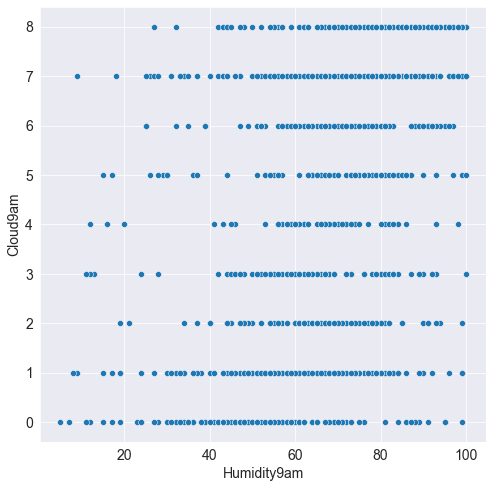

In [15]:
sns.scatterplot( data=data.sample(2000), x='Humidity9am', y='Cloud9am')

<AxesSubplot:xlabel='Humidity3pm', ylabel='Cloud9am'>

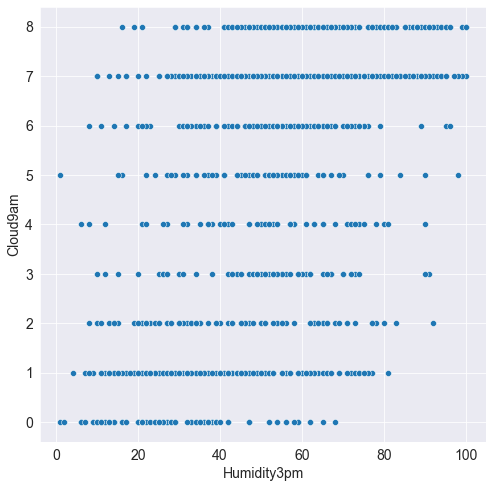

In [16]:
sns.scatterplot( data=data.sample(2000), x='Humidity3pm', y='Cloud9am')

### Cloud3pm

In [17]:
# print number of labels in Cloud3pm variable
print('Cloud3pm conatins', data.Cloud3pm.nunique(), 'labels')

Cloud3pm conatins 10 labels


In [18]:
data.Cloud3pm.value_counts()

7.0    18229
1.0    14976
8.0    12660
6.0     8978
2.0     7226
3.0     6921
5.0     6815
4.0     5322
0.0     4974
9.0        1
Name: Cloud3pm, dtype: int64

In [19]:
data.Cloud3pm.isna().sum()

59358

<AxesSubplot:xlabel='Cloud3pm', ylabel='Count'>

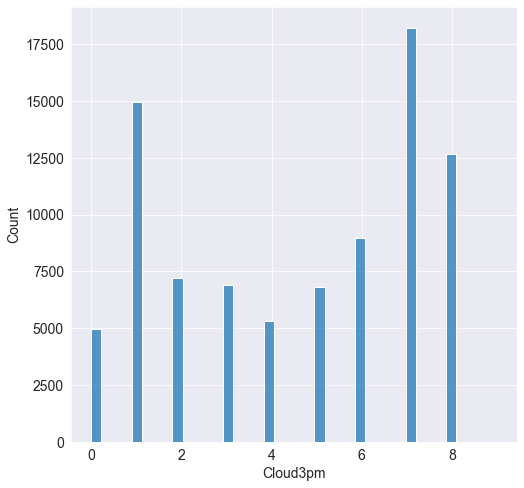

In [20]:
sns.histplot(data.Cloud3pm)

<AxesSubplot:xlabel='Humidity3pm', ylabel='Cloud3pm'>

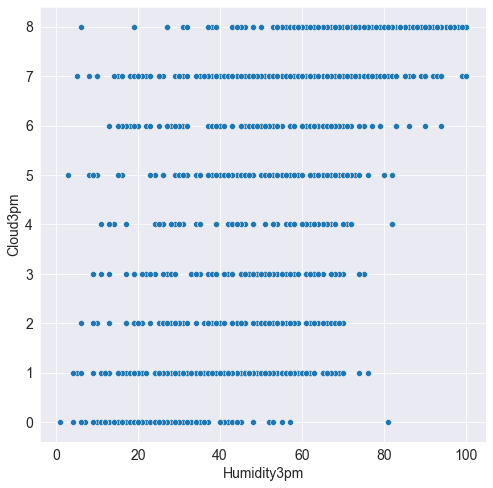

In [21]:
sns.scatterplot( data=data.sample(2000), x='Humidity3pm', y='Cloud3pm')

<AxesSubplot:xlabel='Humidity9am', ylabel='Cloud3pm'>

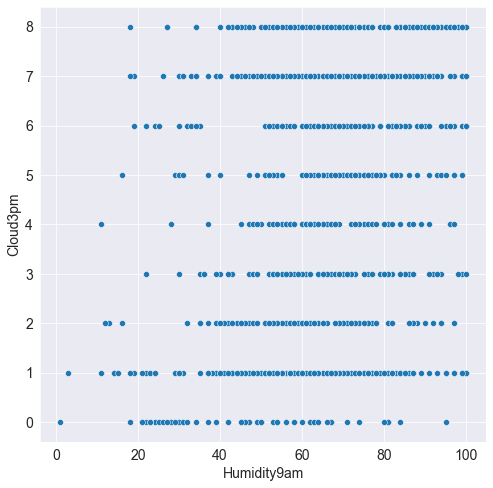

In [22]:
sns.scatterplot( data=data.sample(2000), x='Humidity9am', y='Cloud3pm')

### Temp9am

In [23]:
# print number of labels in Temp9am variable
print('Temp9am conatins', data.Temp9am.nunique(), 'labels')

Temp9am conatins 441 labels


In [24]:
data.Temp9am.value_counts()

 17.0    912
 13.8    900
 14.8    894
 16.0    882
 14.0    876
        ... 
-7.2       1
-7.0       1
-3.5       1
-6.2       1
 38.0      1
Name: Temp9am, Length: 441, dtype: int64

In [25]:
data.Temp9am.isna().sum()

1767

<AxesSubplot:xlabel='Temp9am', ylabel='Count'>

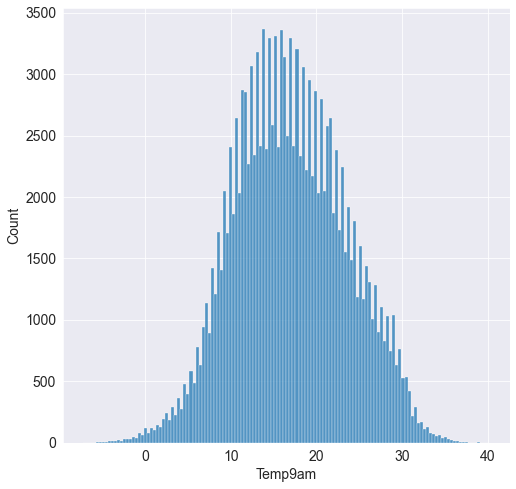

In [26]:
sns.histplot(data.Temp9am)

<AxesSubplot:xlabel='Temp9am', ylabel='Evaporation'>

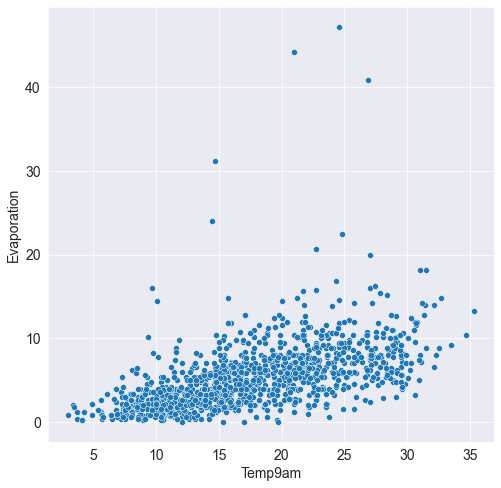

In [27]:
sns.scatterplot( data=data.sample(2000), x='Temp9am', y='Evaporation')

In [28]:
# Cloud9am,Cloud3pm,Temp9am,Temp3pm, Rainfall, Evaporation, Sunshine

<AxesSubplot:xlabel='Temp9am', ylabel='Temp3pm'>

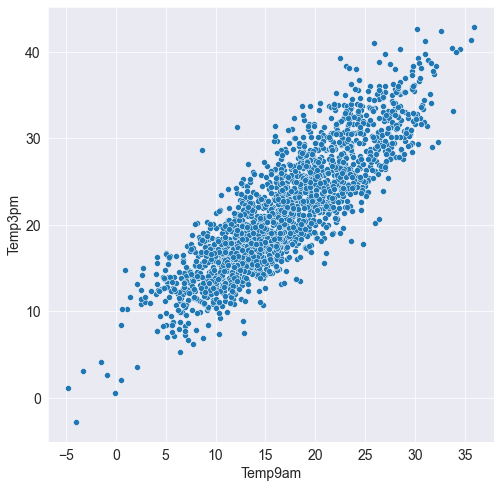

In [29]:
sns.scatterplot( data=data.sample(2000), x='Temp9am', y='Temp3pm')

### Temp3pm

In [30]:
# print number of labels in Temp3pm variable
print('Temp3pm conatins', data.Temp3pm.nunique(), 'labels')

Temp3pm conatins 502 labels


In [31]:
data.Temp3pm.value_counts()

 20.0    882
 19.0    869
 18.5    869
 18.4    868
 17.8    859
        ... 
 46.2      1
-3.4       1
-4.1       1
 46.7      1
 45.0      1
Name: Temp3pm, Length: 502, dtype: int64

In [32]:
data.Temp3pm.isna().sum()

3609

<AxesSubplot:xlabel='Temp3pm', ylabel='Count'>

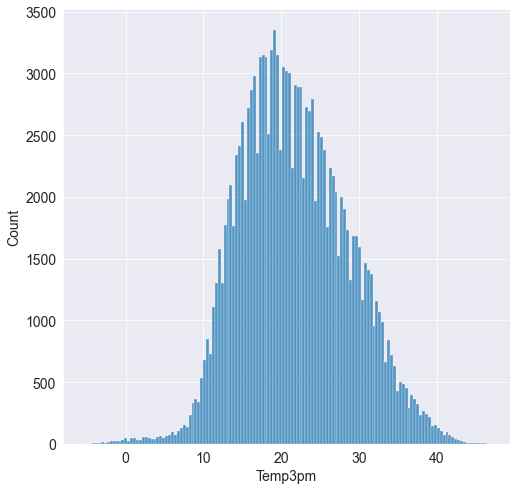

In [33]:
sns.histplot(data.Temp3pm)

<AxesSubplot:xlabel='Temp9am', ylabel='Evaporation'>

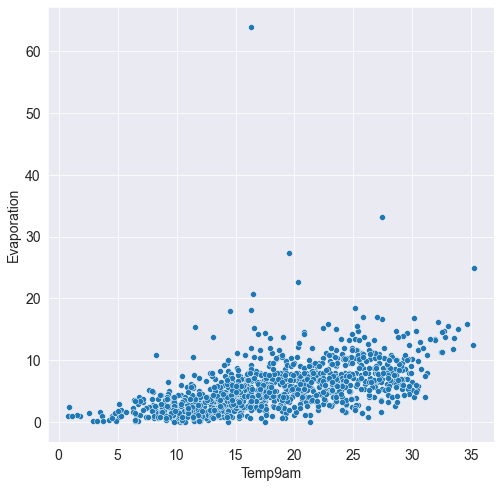

In [34]:
sns.scatterplot( data=data.sample(2000), x='Temp9am', y='Evaporation')

<AxesSubplot:xlabel='Temp9am', ylabel='Sunshine'>

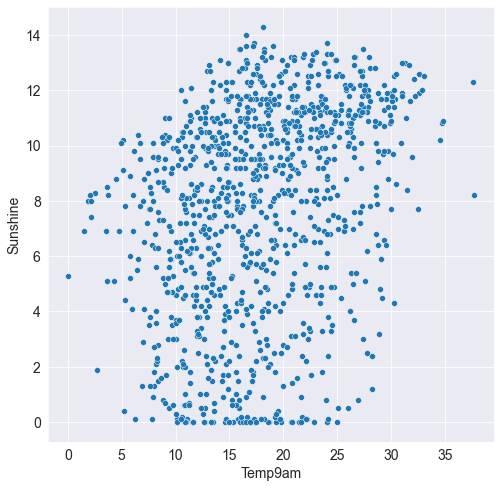

In [35]:
sns.scatterplot( data=data.sample(2000), x='Temp9am', y='Sunshine')

### Evaporation

In [36]:
# print number of labels in Evaporation variable
print('Evaporation conatins', data.Evaporation.nunique(), 'labels')

Evaporation conatins 358 labels


In [37]:
data.Evaporation.value_counts()

4.0     3339
8.0     2609
2.2     2095
2.0     2032
2.4     2003
        ... 
17.1       1
19.7       1
20.5       1
18.1       1
39.6       1
Name: Evaporation, Length: 358, dtype: int64

In [38]:
data.Evaporation.isna().sum()

62790

<AxesSubplot:xlabel='Evaporation', ylabel='MaxTemp'>

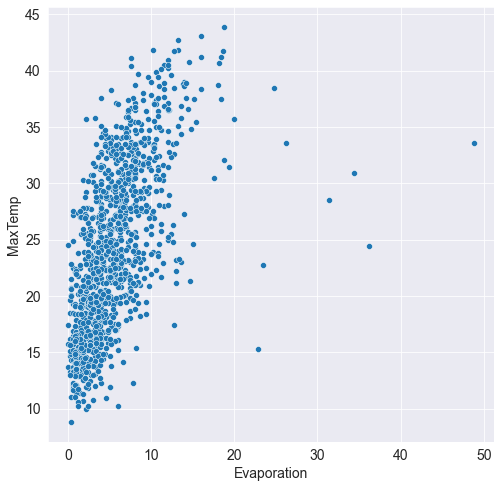

In [39]:
sns.scatterplot( data=data.sample(2000), x='Evaporation', y='MaxTemp')

<AxesSubplot:xlabel='Evaporation', ylabel='MinTemp'>

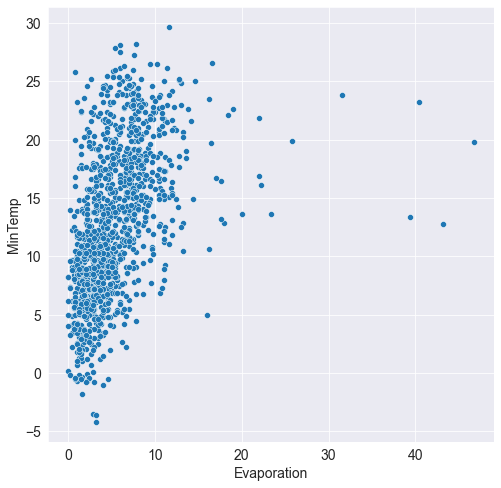

In [40]:
sns.scatterplot( data=data.sample(2000), x='Evaporation', y='MinTemp')

### Sunshine

In [41]:
# print number of labels in Sunshine variable
print('Sunshine conatins', data.Sunshine.nunique(), 'labels')

Sunshine conatins 145 labels


In [42]:
data.Sunshine.value_counts()

0.0     2359
10.7    1101
11.0    1094
10.8    1069
10.5    1027
        ... 
14.0      15
14.1       6
14.3       4
14.2       2
14.5       1
Name: Sunshine, Length: 145, dtype: int64

In [43]:
data.Sunshine.isna().sum()

69835

<AxesSubplot:xlabel='Sunshine', ylabel='MinTemp'>

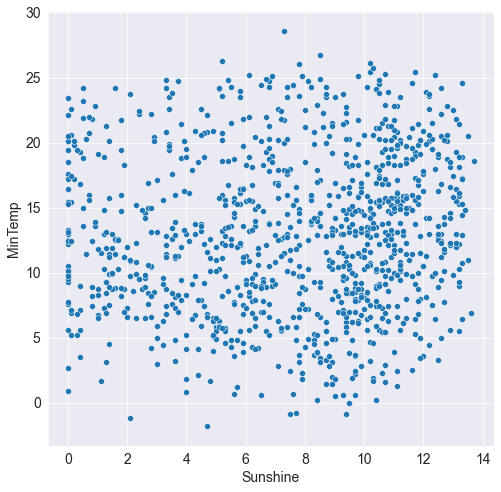

In [44]:
sns.scatterplot( data=data.sample(2000), x='Sunshine', y='MinTemp')

<AxesSubplot:xlabel='Sunshine', ylabel='MaxTemp'>

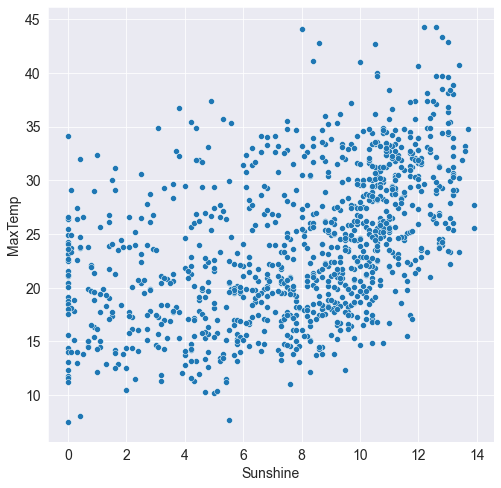

In [45]:
sns.scatterplot( data=data.sample(2000), x='Sunshine', y='MaxTemp')

## Analysis of Categorical to Categorical Columns

In [49]:
cat_columns = data.select_dtypes('object').columns.to_list()
cat_columns

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

### Location and RainTomorrow

In [55]:
ct_counts = data.groupby(['Location', 'RainTomorrow']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'RainTomorrow', columns = 'Location', values = 'count')

<AxesSubplot:xlabel='Location', ylabel='RainTomorrow'>

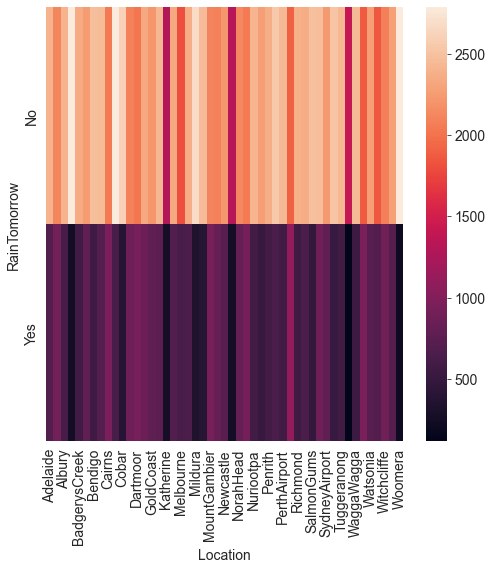

In [52]:
sns.heatmap(ct_counts)

In [57]:
pd.to_datetime(data.Date).dt.year

0         2008
1         2008
2         2008
3         2008
4         2008
          ... 
145455    2017
145456    2017
145457    2017
145458    2017
145459    2017
Name: Date, Length: 145460, dtype: int64

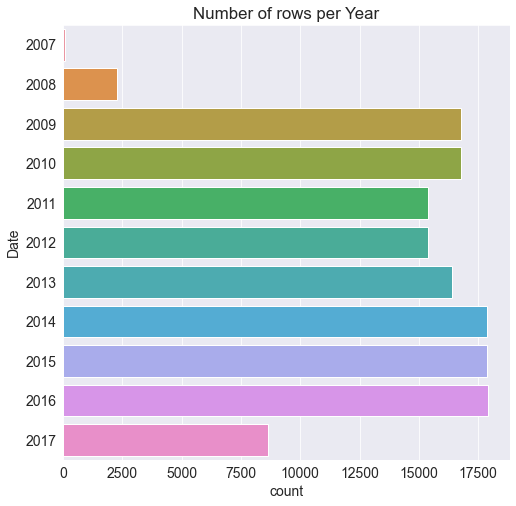

In [58]:
plt.title("Number of rows per Year")
sns.countplot(y=pd.to_datetime(data.Date).dt.year)
plt.show()

In [59]:
data['Date'] = pd.to_datetime(data['Date'])
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [60]:
data['Year'] = data['Date'].dt.year

### Date in Year and RainToday

In [61]:
ct_counts1 = data.groupby(['Year', 'RainToday']).size()
ct_counts1 = ct_counts1.reset_index(name = 'count')
ct_counts1 = ct_counts1.pivot(index = 'RainToday', columns = 'Year', values = 'count')

<AxesSubplot:xlabel='Year', ylabel='RainToday'>

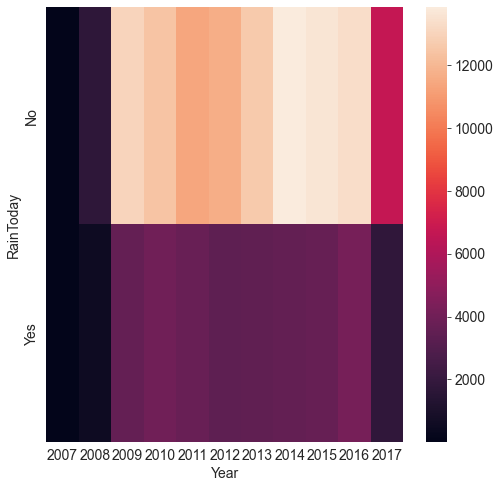

In [62]:
sns.heatmap(ct_counts1)

## Analysis of Numerical to Categorical Columns

In [58]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(6,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

<AxesSubplot:xlabel='RainToday', ylabel='Temp3pm'>

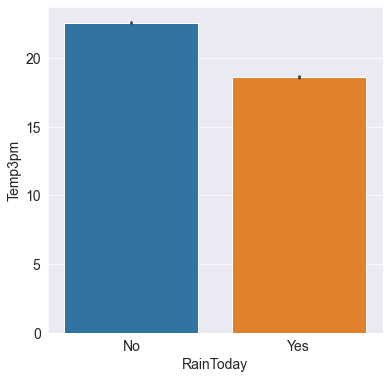

In [59]:
sns.barplot(data=data, x="RainToday", y="Temp3pm")

<AxesSubplot:xlabel='RainTomorrow', ylabel='Temp3pm'>

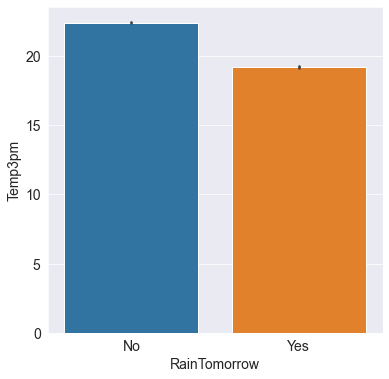

In [60]:
sns.barplot(data=data, x="RainTomorrow", y="Temp3pm")

<AxesSubplot:xlabel='WindGustDir', ylabel='Temp3pm'>

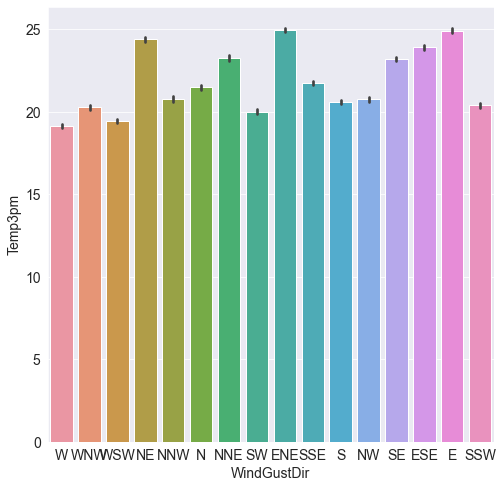

In [62]:
matplotlib.rcParams['figure.figsize']=(8,8)
sns.barplot(data=data, x="WindGustDir", y="Temp3pm")

### Analysis of Temp9am with RainToday , RainTomorrow , WindGustDir

<AxesSubplot:xlabel='RainToday', ylabel='Temp9am'>

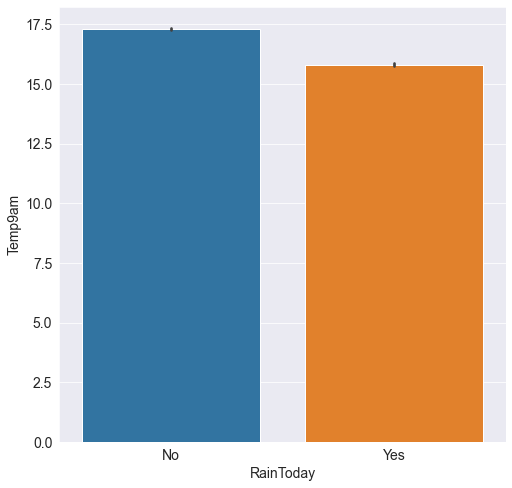

In [63]:
sns.barplot(data=data, x="RainToday", y="Temp9am")

<AxesSubplot:xlabel='RainTomorrow', ylabel='Temp9am'>

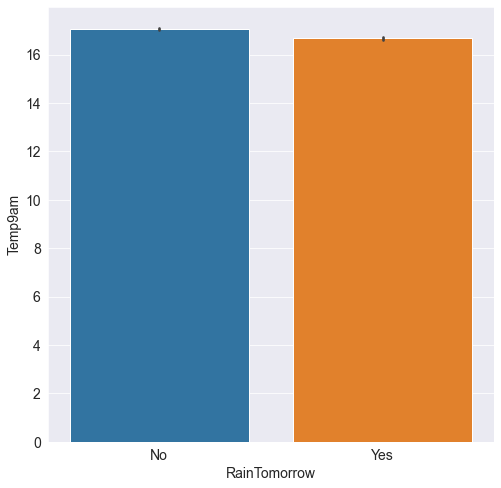

In [64]:
sns.barplot(data=data, x="RainTomorrow", y="Temp9am")

<AxesSubplot:xlabel='WindGustDir', ylabel='Temp9am'>

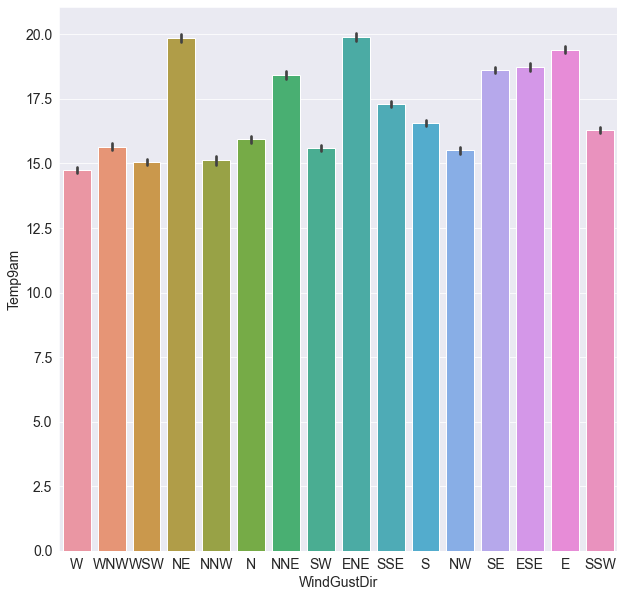

In [67]:
matplotlib.rcParams['figure.figsize']=(10,10)
sns.barplot(data=data, x="WindGustDir", y="Temp9am")